![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# 人工智能基础课机器学习 第三节课作业 线性回归

同学们大家好，本次作业是考察学生对线性回归的理解与SKLearn的使用，以及pandas的使用。

本次作业的数据集：data.csv
这份数据代表了一个循环发电厂，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)

问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即: PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH 而需要学习的，就是W0,W1,W2,W3,W4这5个参数。


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 第一步：读取样本数据，并将数据集分为训练集和测试集




In [7]:
# 读取Data文件
df = pd.read_csv('./data.csv')    
m = df.shape[0]

# 获取每列数据
x_at = np.array(df.AT)
x_v = np.array(df.V)
x_ap = np.array(df.AP)
x_rh = np.array(df.RH)
y = np.array(df.PE)


# 类型转换，合并 x
x_at = np.reshape(x_at,(m,1))
x_v = np.reshape(x_v,(m,1))
x_ap = np.reshape(x_ap,(m,1))
x_rh = np.reshape(x_rh,(m,1))
y = np.reshape(y,(m,1))
X = np.hstack((x_at,x_v,x_ap,x_rh))

# 训练集 和 测试集
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=111)

#  第二步：训练Linear Regreesion模型，得到训练参数



In [8]:
lr = LinearRegression()

lr.fit(x_train,y_train)

# 训练参数
W1 = lr.coef_[0][0]
W2 = lr.coef_[0][1]
W3 = lr.coef_[0][2]
W4 = lr.coef_[0][3]
W0 = lr.intercept_[0]

print(f'W0 : {W0}  W1 : {W1}  W2 : {W2}  W3 : {W3}  W4 : {W4}  ')

W0 : 454.99328877561936  W1 : -1.9669513558482756  W2 : -0.2380258726946393  W3 : 0.061359041607583306  W4 : -0.1526638287138503  


# 第三步：使用均方误差和均方根误差在测试集上的表现来评价模型的好坏。



In [11]:
y_pred = lr.predict(x_test)

m = x_test.shape[0]
MSE = np.square(y_pred - y_test).sum()/m

RMSE = MSE ** 0.5

print(f'均方误差:MSE = {MSE}')
print(f'均方根误差:RMSE = {RMSE}')

均方误差:MSE = 20.24749913610119
均方根误差:RMSE = 4.499722117653621


# 第四步：可视化的方式直观的表示模型学习效果的好坏



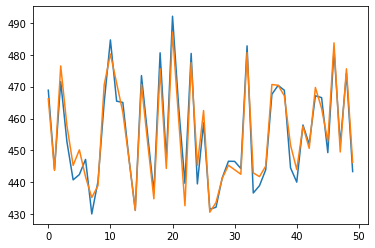

In [5]:
'''
    数据太多了，直接显示效果很差，我还不会优化，所以只截取了前50个做演示
'''
y_pred = y_pred[:50]
y_test = y_test[:50]

plt.plot(y_test)
plt.plot(y_pred)
plt.show()